In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
dataset = pd.read_csv("/kaggle/input/college-placement/placement-dataset.csv")
dataset.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0


In [4]:
dataset.isnull().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

<Axes: xlabel='cgpa', ylabel='iq'>

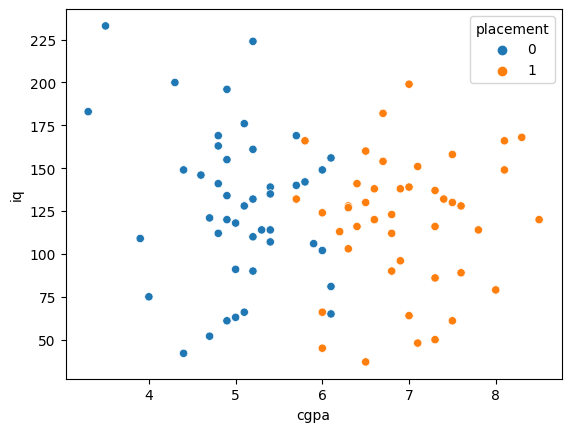

In [6]:
sns.scatterplot(x="cgpa",y="iq",hue="placement",data=dataset)

In [7]:
x = dataset[["cgpa","iq"]]
y = dataset["placement"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.svm import SVC 
sv = SVC(kernel="rbf")

In [10]:
sv.fit(x_train,y_train)

SVC()

In [11]:
sv.score(x_train,y_train)*100

55.714285714285715

In [12]:
sv.score(x_test,y_test)*100

50.0

In [13]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

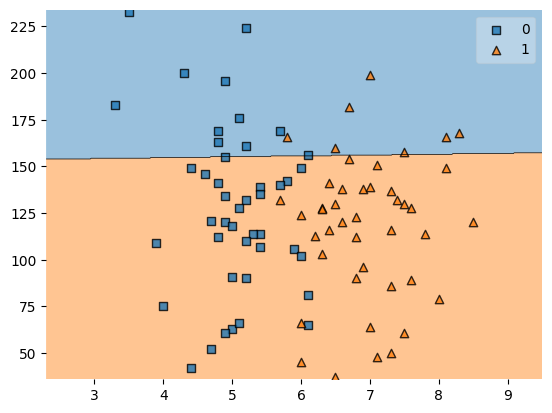

In [14]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sv)